# Shgoun Board Game
> *Text*
> <div class="alert alert-block alert-info">
><b>Disclaimer:</b> Due to this project being done at a beginner level during high school, all features are not fully matured and this concern mostly the visuals and the gameplay. This game is expected to be played on a <b>1980x1080 screen</b> with a <b>aspect ratio of 1</b> (e.g. 100%).
></div>
>
> ***
> **Import Libraries**

In [1]:
from tkinter import *
import tkinter.font as font
import random
import webbrowser
import os

> ## Function Definition
> *This part of the notebook intend to create all the functions that will be needed for the game. Some will be explained, some will not, as most of the code is simple and speaks for itself.*
> ***
> ### Menu
> - This is where we want to create a welcoming menu page where players can start to **play**, read the **instructions** or simply **exit**. Here is a preview.
>
>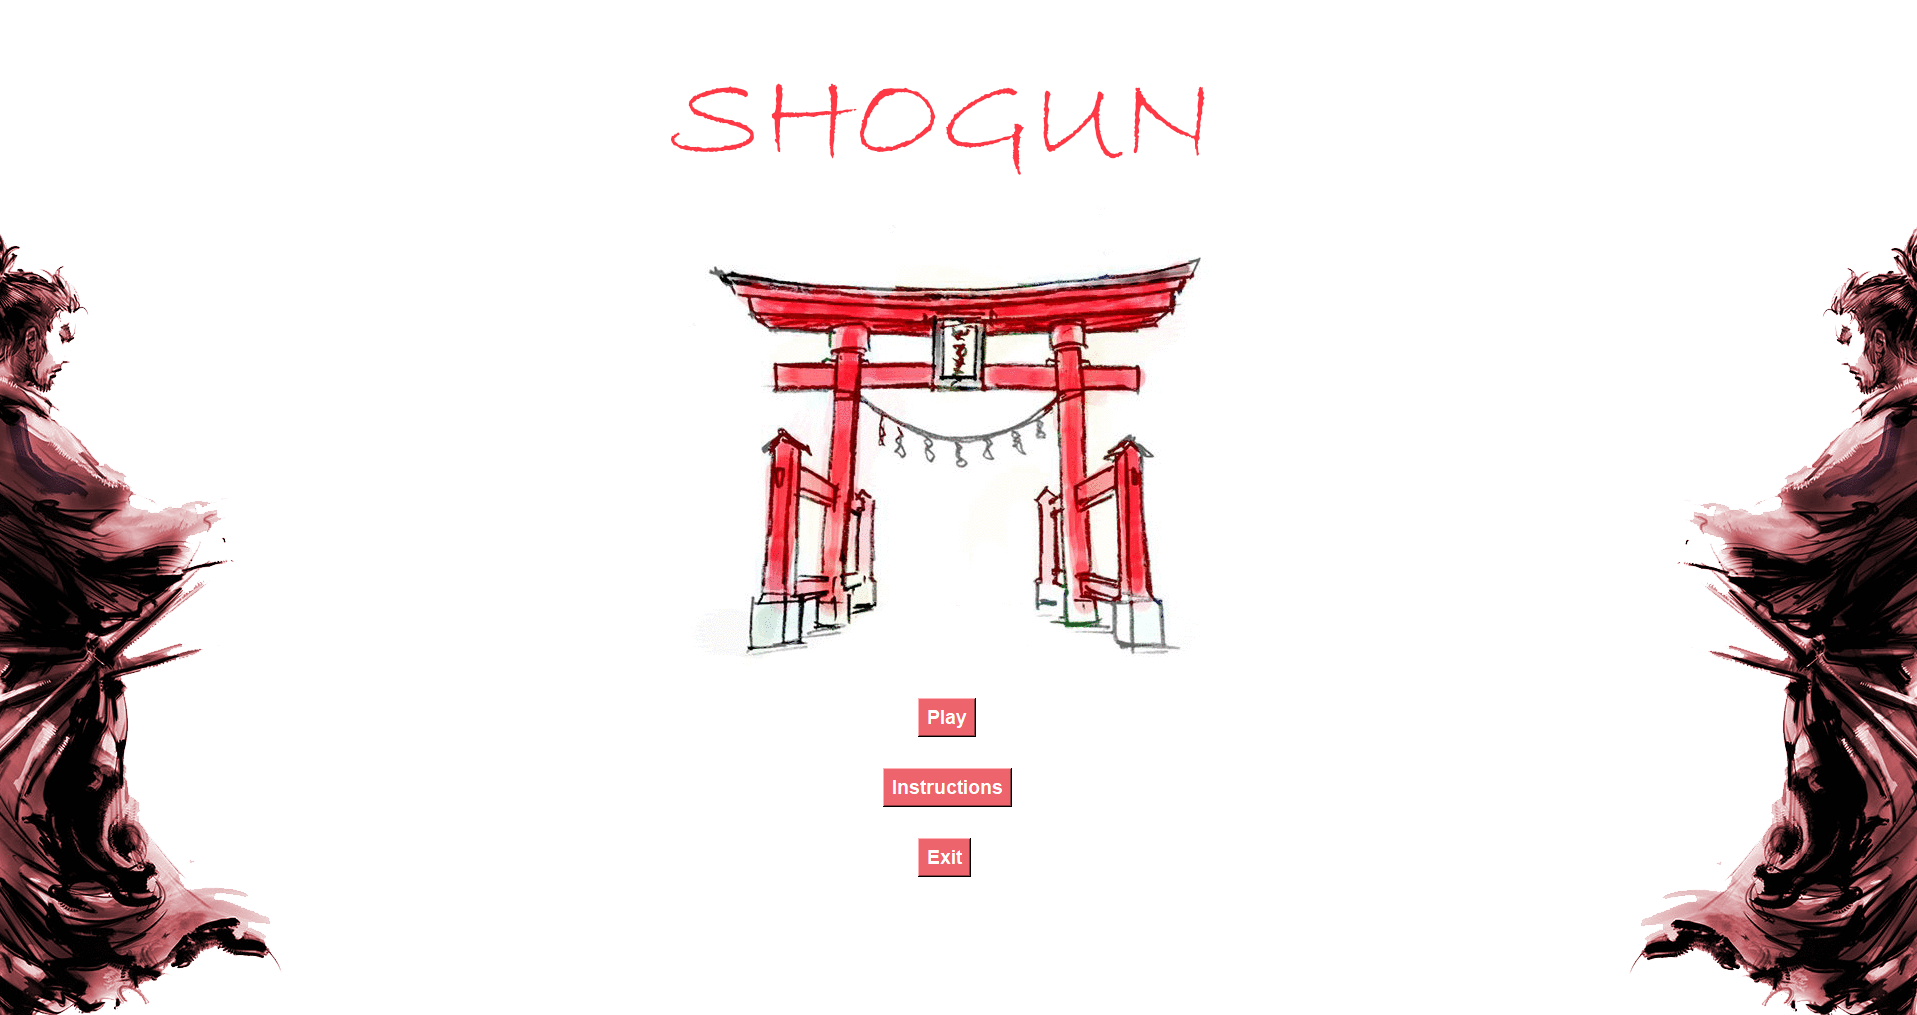

In [2]:
def menu():
    global can1,but1,but2,but3,but4,exit
    
    # Background
    can1=Canvas(mywindow,width=1920,height=1080) 
    can1.place(x=0,y=0)
    can1.create_image(959,540,image=photo)
    
    # Buttons
    buttonfont = font.Font(family='Helvetica', size=14, weight='bold')
    but2=Button(mywindow,text='Play',bg='#ee646d',fg='#ffffff',font=buttonfont,command=game)
    but2.place(x=920,y=700)
    but3=Button(mywindow,text='Instructions',bg='#ee646d',fg='#ffffff',font=buttonfont,command=open_website)
    but3.place(x=885,y=770)
    but5=Button(mywindow,text='Exit',bg='#ee646d',fg='#ffffff',font=buttonfont,command=mywindow.destroy)
    but5.place(x=920,y=840)

> ***
> ### Menu
> - We will do the same thing for the game area. Here is a preview.
>
>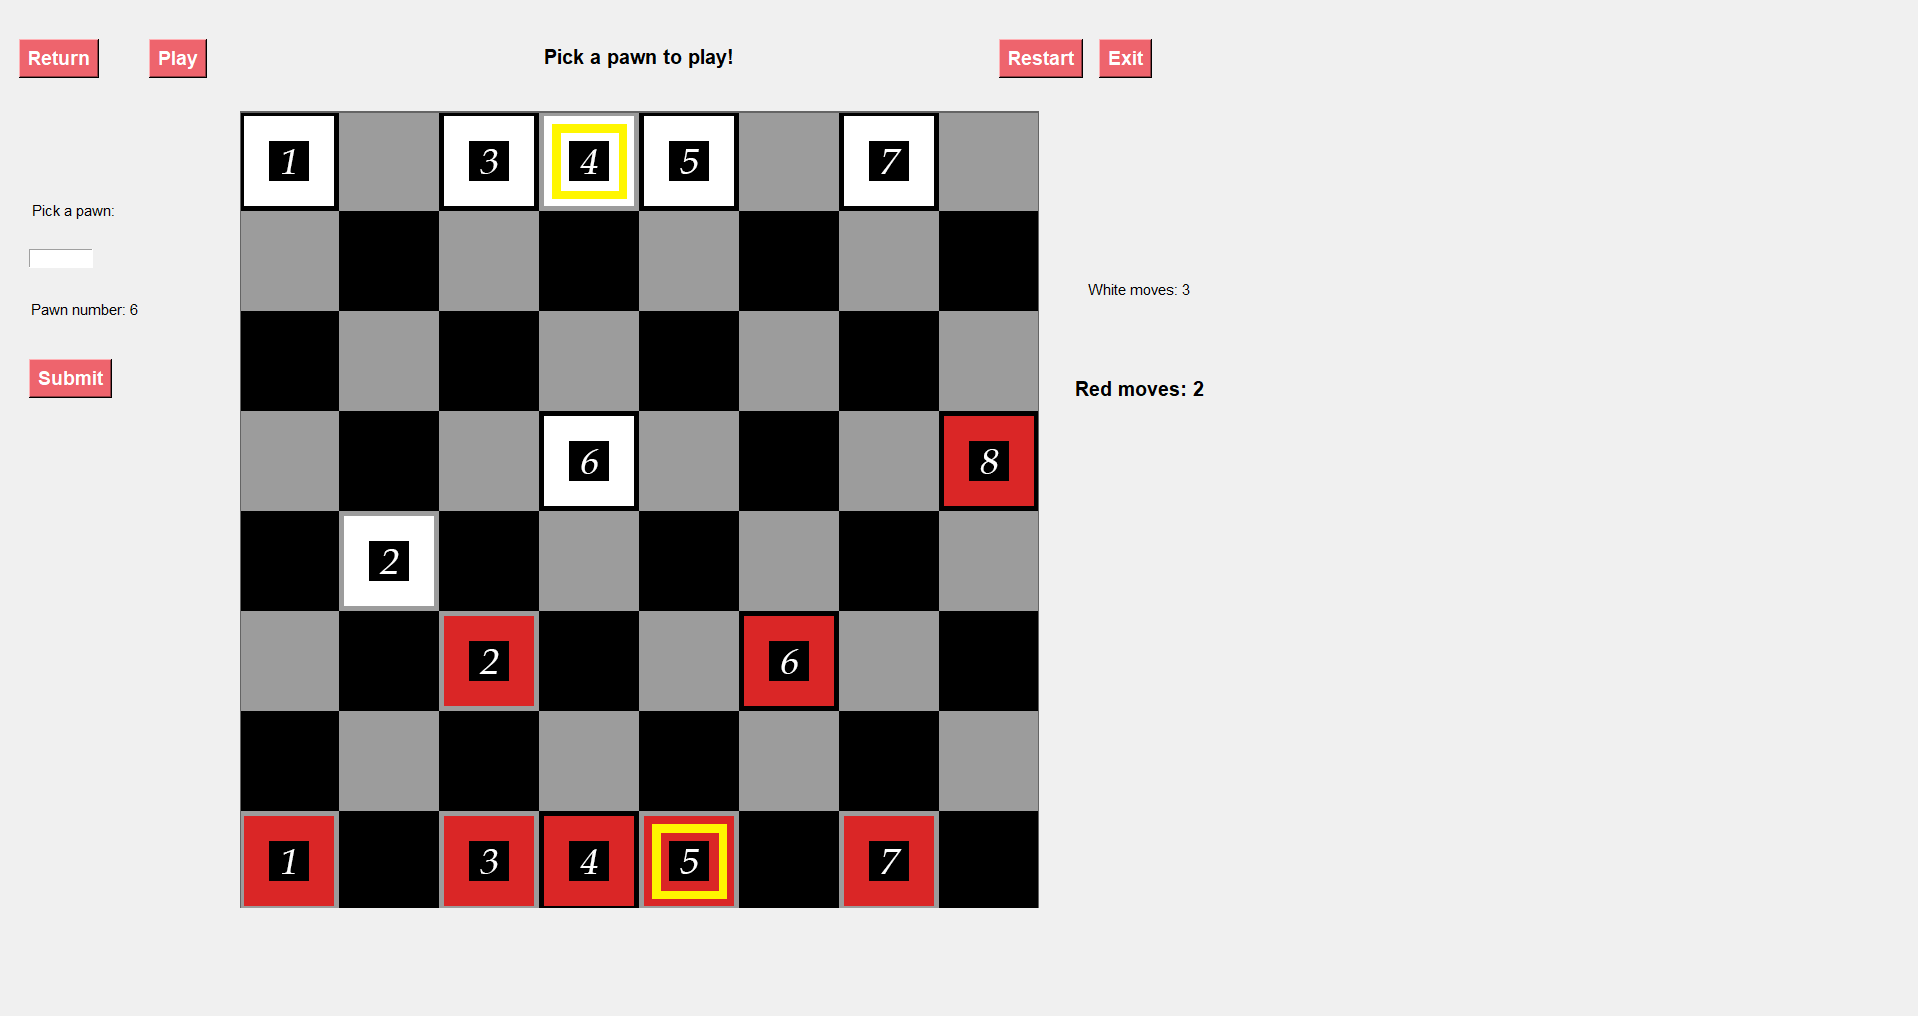

In [3]:
def game():
    global can1,can2,can3,can4,but1,but2,exit,whichpawn, pawnplayer1, pawnplayer2
    
    # Background
    can1=Canvas(mywindow,width=1920,height=1080)
    can1.place(x=0,y=0)
    
    # Font
    buttonfont = font.Font(family='Helvetica', size=14, weight='bold')

    # First button is an image
    but1=Button(mywindow,text='Exit',bg='#ee646d',fg='#ffffff',font=buttonfont,command=mywindow.destroy)
    but1.place(x=1100,y=40)
    
    #Buttons
    but2=Button(mywindow,text='Play',bg='#ee646d',fg='#ffffff',font=buttonfont,command=moving)
    but2.place(x=150,y=40)
    but3=Button(mywindow,text='Restart',bg='#ee646d',fg='#ffffff',font=buttonfont,command=game)
    but3.place(x=1000,y=40)

    # Checkerboard
    can2=Canvas(mywindow,height=797,width=797)
    can2.place(x=240,y=112)
    can2.create_image(400,400,image=damier)

    # Left canva
    can3=Canvas(mywindow,height=800,width=237)
    can3.place(x=0,y=110)

    # Right Canva
    can4=Canvas(mywindow,height=800,width=237)
    can4.place(x=1040,y=110)

    # Bottom Canva
    can5=Canvas(mywindow,width=1280,height=115)
    can5.place(x=0,y=909)

    # Text
    nbmoveplayer1=can4.create_text(100,180,text="White moves: "+str(move1),fill="black", font=("helvetica",15,"bold"), tags="cr")       
    nbmoveplayer2=can4.create_text(100,280,text="Red moves: "+str(move2),fill="black", font=("helvetica",9), tags="cr")       

    # Pawns Data
    pawnplayer1= [[50,50,3,1,pawnshogunwhite1],
                  [150,50,3,1,pawnshogunwhite2],
                  [250,50,3,1,pawnshogunwhite3],
                  [350,50,3,1,shogun1], 
                  [450,50,3,1,pawnshogunwhite5],
                  [550,50,3,1,pawnshogunwhite6], 
                  [650,50,3,1,pawnshogunwhite7],
                  [750,50,3,1,pawnshogunwhite8]]
    pawnplayer2= [[50,750,3,1,pawnshogunred1],
                  [150,750,3,1,pawnshogunred2],
                  [250,750,3,1,pawnshogunred3],
                  [350,750,3,1,pawnshogunred4], 
                  [450,750,3,1,shogun2],
                  [550,750,3,1,pawnshogunred6],
                  [650,750,3,1,pawnshogunred7],
                  [750,750,3,1,pawnshogunred8]]
    
    # Pawn image placement
    whichpawn = []
    for i in range (16):
        pawn = pawnplayer1
        j = i
        if i >7 :
            pawn = pawnplayer2
            j = i-8
        whichpawn += [can2.create_image(pawn[j][0],pawn[j][1],image=pawn[j][4])]

> ***
> ### Gameplay
> - Here are all the functions that involves all the actions related to **playing the game**. 

In [4]:
def player_next():
    global i,move1,move2
    if i:
        i = 0
        move1=random.randint(1,3)
    else:
        i = 1
        move2=random.randint(1,3)
    moving()

In [5]:
def moving():
    global i,can2,can4,pawnplayer1,pawnplayer2,number,whichpawn,move1,move2
    
    # Font
    buttonfont = font.Font(family='Helvetica', size=14, weight='bold')
    
    # Button
    but5=Button(mywindow,text='Return',bg='#ee646d',fg='#ffffff',font=buttonfont,command=menu)
    but5.place(x=20,y=40)

    question()
    
    # Wait for the player to press keys
    can2.focus_set()
    can2.bind('<Key>',keyboard)

In [6]:
def question():
    global can3,nbre
    
    # Font
    buttonfont = font.Font(family='Helvetica', size=14, weight='bold')
    
    question=Label(mywindow, text="Pick a pawn:",font=("helvetica",11), fg="black")
    question.place(x=30,y=200)
    
    nbre=StringVar()
    
    # Collect pawn number
    reponse=Entry(mywindow, textvariable=nbre, width=10)
    reponse.place(x=30,y=250)
    
    but10=Button(mywindow,text='Submit',bg='#ee646d',fg='#ffffff',font=buttonfont,command=affectation)
    but10.place(x=30,y=360)

In [7]:
def affectation():
    global nbre,can3,number,score,affect
    number=nbre.get()
    number=int(number)
    number=number-1
    pawnenjeu=number+1
    for el in can3.find_withtag("cr3"):
        can3.delete(el)
    score=can3.create_text(85,200,text="Pawn number: "+str(pawnenjeu),font=("helvetica",11),fill="black",tags="cr3")
    can2.focus_set()
    affect=True

In [8]:
def must_change_player():
    global i, move1, move2,affect
    if not move1 or not move2:
        player_next()
        affect=False
        must_resubmit()

In [9]:
def must_stop_game():
    global pawnplayer1, pawnplayer2
    # Game stops whenever the first shogun is dead
    if pawnplayer1[3][0]==-1000 and pawnplayer1[3][1]==-1000:
        return True
    elif pawnplayer2[4][0]==-1000 and pawnplayer2[4][1]==-1000:
        return True

In [10]:
def must_resubmit():
    changingtextplayer=can1.create_text(640,58,text="Pick a pawn to play!",fill="black",font=("helvetica",15,"bold"),tags="cr2")
    for el in can4.find_withtag("cr"):
        can4.delete(el)
    if i:
        nbmoveplayer1=can4.create_text(100,180,text="White moves: "+str(move2),fill="black",font=("helvetica",11), tags="cr")
        nbmoveplayer2=can4.create_text(100,280,text="Red moves: "+str(move1),fill="black", font=("helvetica",15,"bold"), tags="cr")
    else:
        nbmoveplayer1=can4.create_text(100,180,text="White moves: "+str(move2),fill="black",font=("helvetica",15,"bold"), tags="cr")
        nbmoveplayer2=can4.create_text(100,280,text="Red moves: "+str(move1),fill="black",font=("helvetica",11), tags="cr")
    question()

In [11]:
def delete_changingtextplayer():
    for el in can1.find_withtag("cr2"):
        can1.delete(el)

In [12]:
def keyboard(event):
    global i, number, move1, move2, affect
    # Ensuring the game still goes on
    must_change_player()
    must_stop_game()
    # If not
    if not must_stop_game() and affect :
        delete_changingtextplayer()
        list_pawn = whichpawn[:8]
        move   = 0
        pawn   = pawnplayer1
        touche = event.char
        # Here are the keys to move a pawn
        key    = { "z" :(False, False), "s": (False, True), "q": (True, False), "d":(True, True)}
        if i:
            list_pawn = whichpawn[8:]
            pawn = pawnplayer2
            move = 1
        if touche in key.keys():
            move_towards(list_pawn, move, pawn[number], *key[touche])
    elif must_stop_game() :
        game_over()

In [13]:
def move_towards(list_pawn, player_move, pawn, horizontal, positif):
    global can2, whichpawn, number, i
    #Just moving images over the canva
    val = 100
    axe = 0
    if not positif:
        val = -val
    if not horizontal:
        axe = 1
    if i:                              
        list_pawn_j  = pawnplayer2
        list_pawn_nj = pawnplayer1
    else:
        list_pawn_j  = pawnplayer1
        list_pawn_nj = pawnplayer2
    pawn_mm_couleur_x = [ el[0] for el in list_pawn_j ]
    pawn_mm_couleur_x.pop(number)
    pawn_mm_couleur_y = [ el[1] for el in list_pawn_j ]
    pawn_mm_couleur_y.pop(number)
    if pawn[axe]+val not in range(50,850,100):
        return
    if horizontal:
        if pawn[0]+val in pawn_mm_couleur_x and pawn[1] in pawn_mm_couleur_y:
            return
    else:
        if pawn[0] in pawn_mm_couleur_x and pawn[1]+val in pawn_mm_couleur_y:
            return
    pawn[axe] += val
    infomove(player_move)
    can2.coords(list_pawn[number], pawn[0], pawn[1])
    for el in range(len(list_pawn_nj)):
        if list_pawn_nj[el][0] == pawn[0] and list_pawn_nj[el][1] == pawn[1]:
            deca = 0
            if not i:
                deca = 8
            can2.coords(whichpawn[el+deca], -1000, -1000)
            # Yes, a dead pawn simply moves out of canva 
            list_pawn_nj[el][0] = -1000
            list_pawn_nj[el][1] = -1000

In [14]:
def infomove(player_move):
    global can4, move1, move2,i
    if player_move:
        move1 = abs(move1 - 1)
    else:
        move2 = abs(move2 - 1)
    for el in can4.find_withtag("cr"):
        can4.delete(el)
    if i:
        nbmoveplayer1=can4.create_text(100,180,text="White moves: "+str(move2),fill="black",font=("helvetica",9), tags="cr")
        nbmoveplayer2=can4.create_text(100,280,text="Red moves: "+str(move1),fill="black", font=("helvetica",15,"bold"), tags="cr")
    else:
        nbmoveplayer1=can4.create_text(100,180,text="White moves: "+str(move2),fill="black",font=("helvetica",15,"bold"), tags="cr")
        nbmoveplayer2=can4.create_text(100,280,text="Red moves: "+str(move1),fill="black",font=("helvetica",9), tags="cr")

> ***
> ### Game over
> - Here we create a new window at the end of the game where players can either **Replay** or **Exit** the game. Here is a preview.
>
> ![](screeshots/gameover.png)

In [15]:
def game_over():
    global gameover,can1
    
    # Background
    can1=Canvas(mywindow,width=1920,height=1080) 
    can1.place(x=0,y=0)
    can1.create_image(959,540,image=gameover)
    
    # Font
    buttonfont = font.Font(family='Helvetica', size=16, weight='bold')
    
    # Buttons
    but2=Button(mywindow,text='Replay',bg='blue',fg='#ffffff',font=buttonfont,command=game)
    but2.place(x=900,y=750)
    but3=Button(mywindow,text='Exit',bg='blue',fg='#ffffff',font=buttonfont,command=mywindow.destroy)
    but3.place(x=910,y=850)

> ***
> ### Instructions
> - For simplicity and for the purpose of initiating ourselves with very bacis **HTML** and **CSS** notions at the time, the instructions of the game are located on an HTML file.

In [16]:
def open_website():
    webbrowser.open('file:///' + os.path.realpath("instructions/source.html"))

> ***
> ### Variables definitions
> - Here we define most of the variables that will beneeded for the game. Mostly affecting **image files** to be moved around for the game.

In [17]:
# Window sizing
mywindow = Tk()
mywindow.geometry('1080x1920')
mywindow.state('zoomed')

# Initial value of variables
affect=False
i=0

# Load images
photo=PhotoImage(file="images/menushogun.gif")
exit=PhotoImage(file="images/bexit.gif")
damier=PhotoImage(file="images/checkerboard.gif")
gameover=PhotoImage(file="images/gameover.gif")

pawnshogunred1=PhotoImage(file="images/pawnshogunred1.gif")
pawnshogunred2=PhotoImage(file="images/pawnshogunred2.gif")
pawnshogunred3=PhotoImage(file="images/pawnshogunred3.gif")
pawnshogunred4=PhotoImage(file="images/pawnshogunred4.gif")
pawnshogunred6=PhotoImage(file="images/pawnshogunred6.gif")
pawnshogunred7=PhotoImage(file="images/pawnshogunred7.gif")
pawnshogunred8=PhotoImage(file="images/pawnshogunred8.gif")

pawnshogunwhite1=PhotoImage(file="images/pawnshogunwhite1.gif")
pawnshogunwhite2=PhotoImage(file="images/pawnshogunwhite2.gif")
pawnshogunwhite3=PhotoImage(file="images/pawnshogunwhite3.gif")
pawnshogunwhite5=PhotoImage(file="images/pawnshogunwhite5.gif")
pawnshogunwhite6=PhotoImage(file="images/pawnshogunwhite6.gif")
pawnshogunwhite7=PhotoImage(file="images/pawnshogunwhite7.gif")
pawnshogunwhite8=PhotoImage(file="images/pawnshogunwhite8.gif")

shogun1=PhotoImage(file="images/pawnshogunwhite4.gif")
shogun2=PhotoImage(file="images/pawnshogunred5.gif")


move1=random.randint(1,2)
move2=random.randint(1,2)

> ***
> ### Main loop
> - Let's play!

In [18]:
menu()
mywindow.mainloop()

***